In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
dfp = pd.read_csv('IPL_PLAYERS.csv',encoding='unicode_escape')
dfb = pd.read_csv('TOP_BUYS.csv',encoding='unicode-escape')
dfu = pd.read_csv('UNSOLD_PLAYERS.csv',encoding='unicode_escape')

In [55]:
dfb['PRICE_PAID'] = dfb['PRICE_PAID'].str.replace(',',' ').str.strip()
dfb['PRICE_PAID'] = pd.to_numeric(dfb['PRICE_PAID'], errors='coerce', downcast='integer')

In [53]:
dfp.drop(['data'],axis=1,inplace=True)

In [54]:
pd.isnull(dfp).sum()
pd.isnull(dfb).sum()
pd.isnull(dfu).sum()

PLAYER         0
NATIONALITY    0
TYPE           0
BASE PRICE     0
dtype: int64

In [50]:
dfb.dropna(inplace=True)

In [63]:
dfb.rename(columns={'NATIONALITY':'PLAYER'},inplace=True)

In [52]:
dfp.describe()
dfb.describe()
dfu.describe()

,BASE PRICE
count,2.600000e+02
mean,4.025000e+06
std,4.145560e+06
min,2.000000e+06
25%,2.000000e+06
50%,2.000000e+06
75%,5.000000e+06
max,2.000000e+07


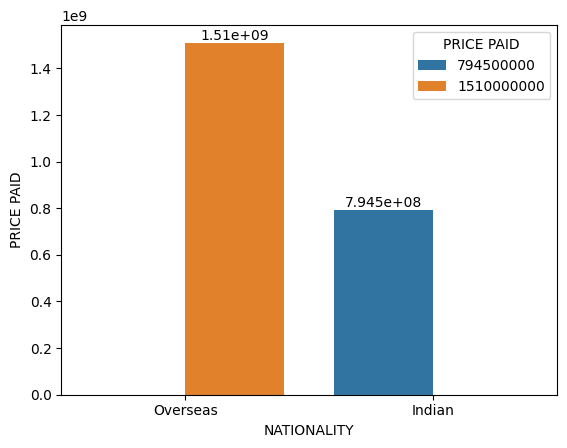

In [19]:
price_nat = dfp.groupby(['NATIONALITY'],as_index=False)['PRICE PAID'].sum().sort_values(by='PRICE PAID',ascending = False)
s_p = sb.barplot(x='NATIONALITY',y='PRICE PAID',data=price_nat,hue='PRICE PAID')
for bars in s_p.containers:
    s_p.bar_label(bars)

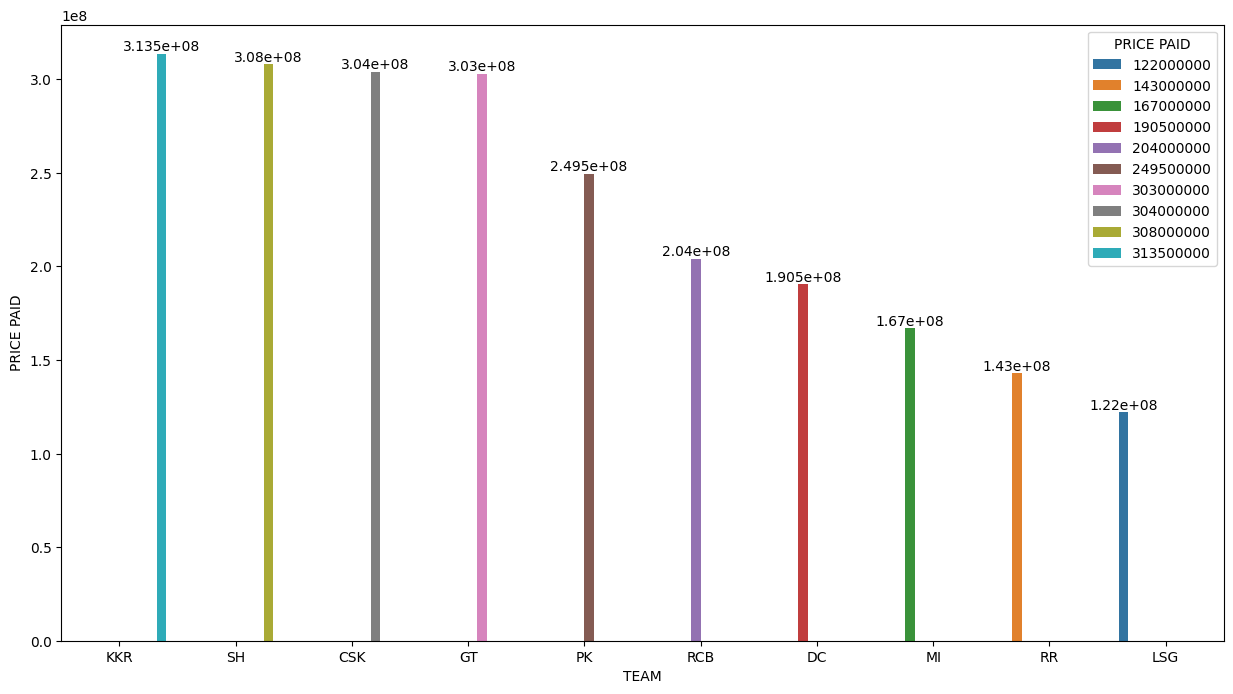

In [33]:
price_nat = dfp.groupby(['TEAM'],as_index=False)['PRICE PAID'].sum().sort_values(by='PRICE PAID',ascending = False)
plt.figure(figsize=(15, 8))
s_p = sb.barplot(x='TEAM',y='PRICE PAID',data=price_nat,hue='PRICE PAID')
for bars in s_p.containers:
    s_p.bar_label(bars)

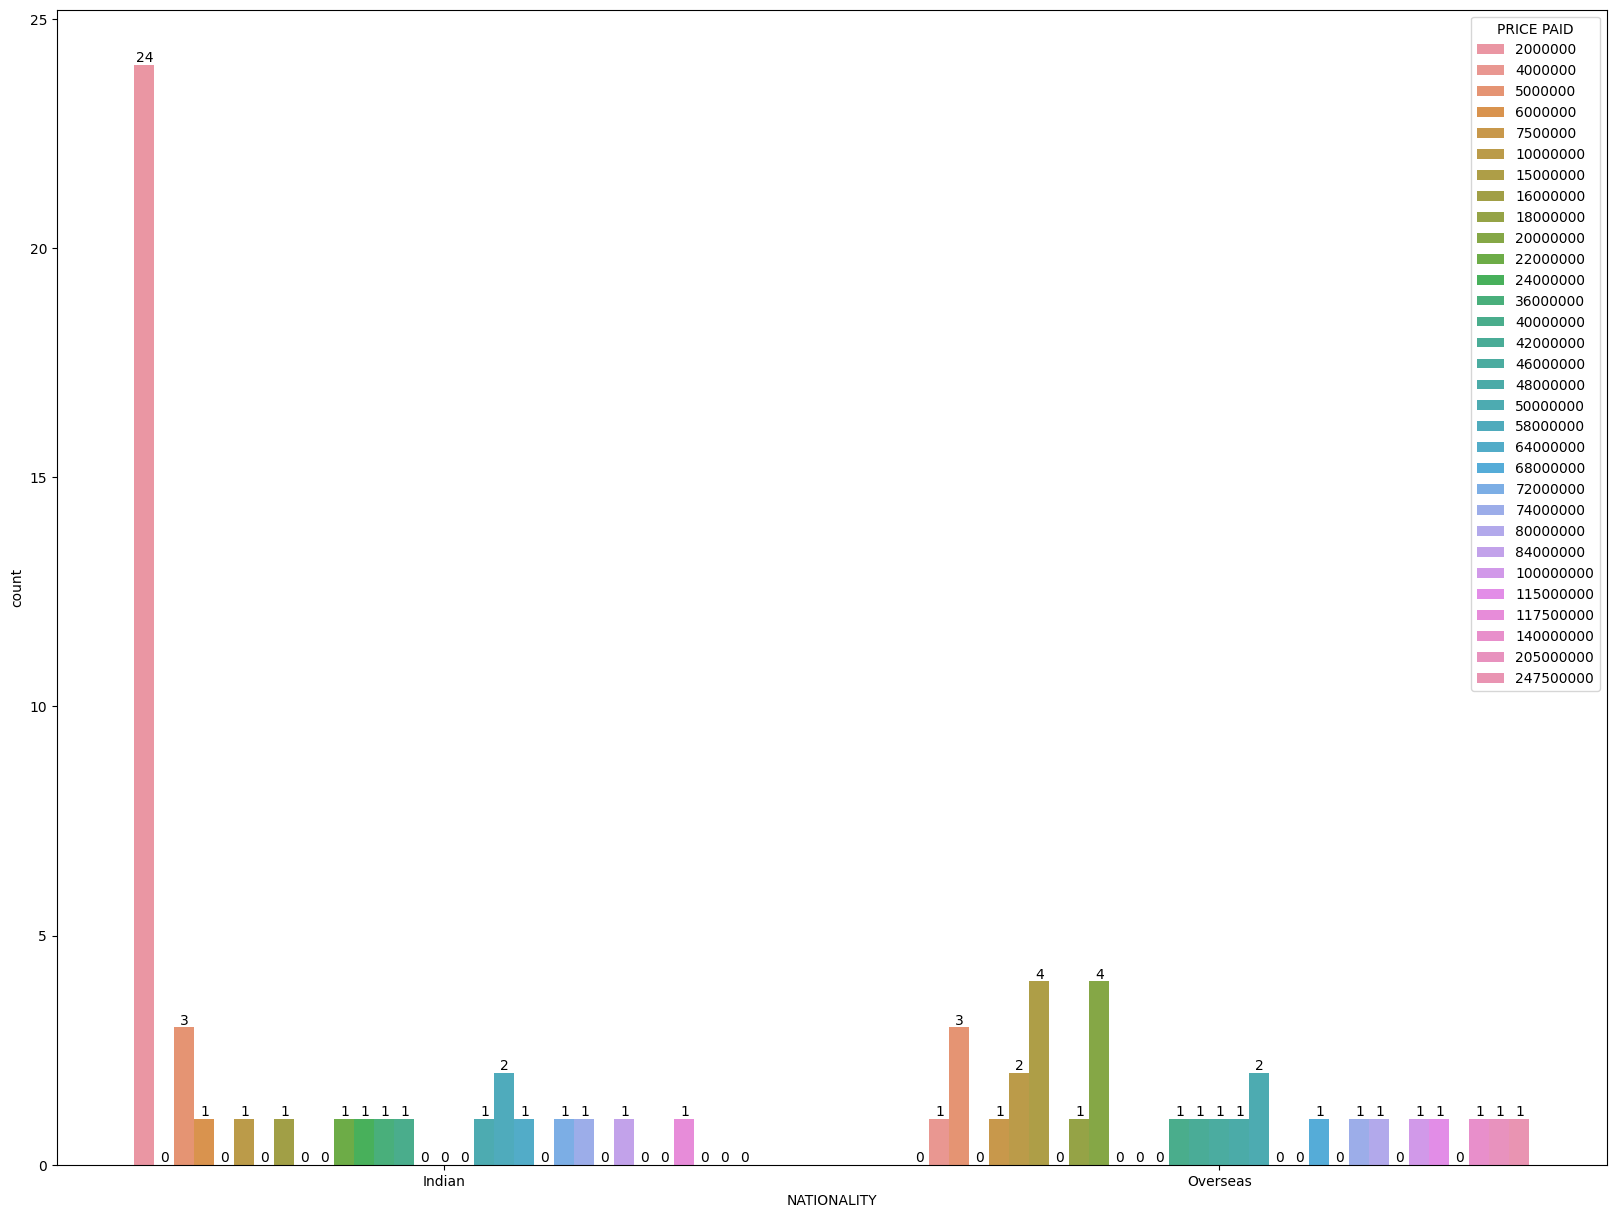

In [46]:
plt.figure(figsize=(30,25))
data = sb.countplot(data=dfp,x = 'TEAM',hue='PRICE PAID')
for bar in data.containers:
    data.bar_label(bar)

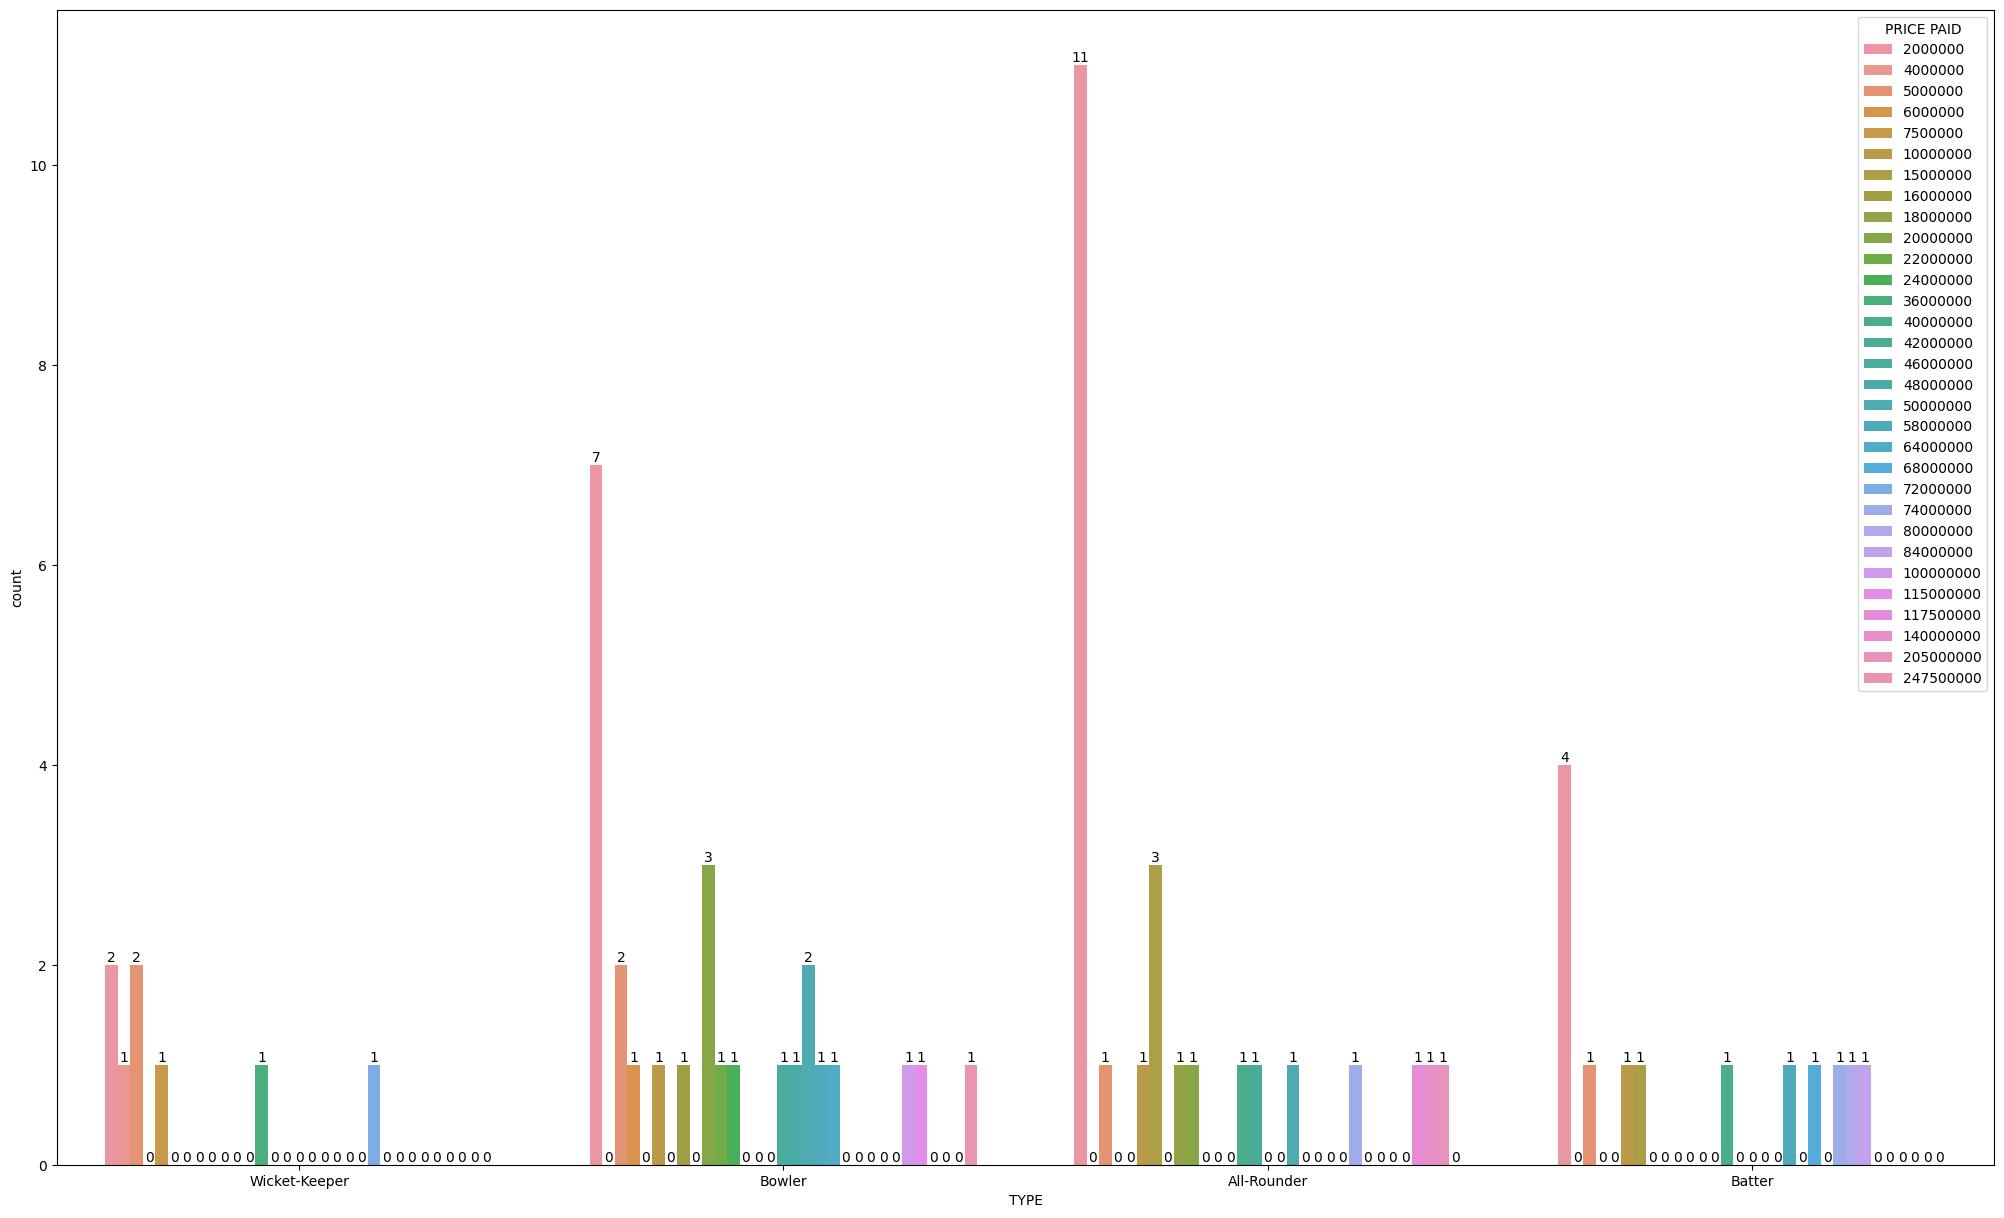

In [73]:
plt.figure(figsize=(25,15))
bars = sb.countplot(x='TYPE',data=dfp,hue='PRICE PAID')
for bar in bars.containers:
    bars.bar_label(bar) 

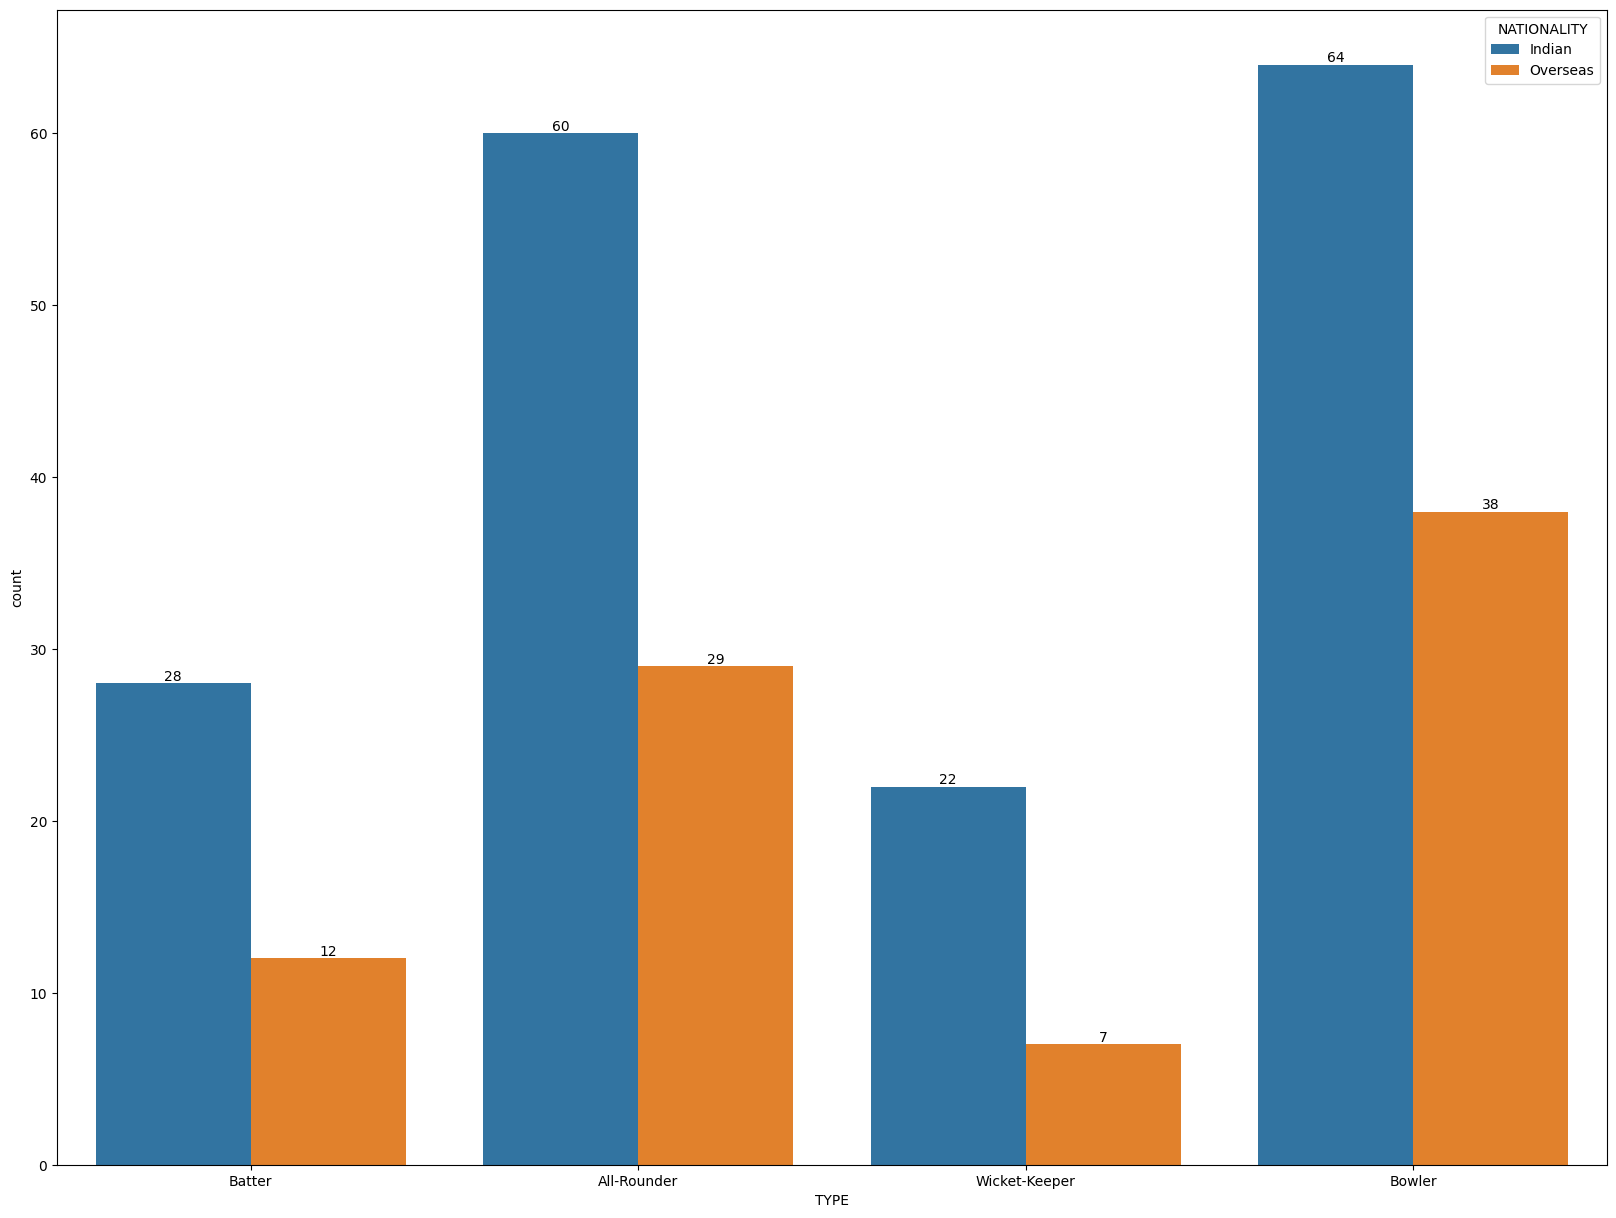

In [76]:
plt.figure(figsize=(20,15))
cps = sb.countplot(data= dfu,x='TYPE',hue='NATIONALITY')
for cp in cps.containers:
    cps.bar_label(cp)